In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import dateutil.parser
import matplotlib.pyplot as plt

In [2]:
# dictionary of text dates and links

# August 2, 2015
url1 = 'https://www.reuters.com/article/us-toyota-sales-idUSKCN0Q805F20150803'

# August 18, 2015
url2 = 'https://uk.reuters.com/article/uk-china-blast-toyota/global-automakers-divert-shipments-from-chinas-tianjin-port-after-blasts-idUKKCN0QO07W20150819'

# September 3, 2015
url3 = 'https://www.reuters.com/article/us-volkswagen-chairman-poetsch/vws-finance-chief-set-to-become-new-chairman-idUSKCN0R31B620150903'

# September 4, 2-15
url4 = 'https://www.reuters.com/article/us-toyota-research-robotics-idUSKCN0R41X220150904'

# September 18, 2015
url5 = 'https://www.reuters.com/article/us-usa-volkswagen-idUSKCN0RI1VK20150918'

# September 21, 2015
url6 = 'https://www.reuters.com/article/us-usa-volkswagen-emission-idUSKCN0RL2EI20150922'

# September 24, 2015
url7 = 'https://www.reuters.com/article/usa-volkswagen-deception-idUSL1N11U1OB20150924'

# September 29, 2015
url8 = 'https://www.reuters.com/article/volkswagen-emissions-technology-idUSL1N11Z1XQ20150929'


# October 8, 2015
url9 = 'https://www.reuters.com/article/us-volkswagen-emissions-consumers-insigh-idUSKCN0S20CK20151008'

# October 13, 2015
url10 = 'https://in.reuters.com/article/us-volkswagen-emissions-investment/vw-looks-to-cutbacks-and-electric-cars-to-overcome-scandal-idUKKCN0S710020151013'

# October 21, 2015
url11 = 'https://ca.reuters.com/article/businessNews/idCAKCN0SF1FU20151021'

# October 22, 2015
url12 = 'https://www.reuters.com/article/us-volkswagen-emissions-brazil-idUSKCN0SG1N720151022'


# October 28, 2015
url13 = 'https://www.reuters.com/article/us-volkswagen-emissions-dealers-idUSKCN0SM2SG20151028'

# November 4, 2015
url14 = 'https://www.reuters.com/article/us-volkswagen-emissions-idUSKCN0ST1VY20151104'

# November 8, 2015
url15 = 'https://www.reuters.com/article/volkswagen-emissions/vw-engineers-have-admitted-manipulating-co2-emissions-data-paper-idUKL8N1320KD20151108'

url_dict = {'08/02/2015':url1,
            '08/18/2015':url2,
            '09/03/2015':url3,
            '09/04/2015':url4,
            '09/18/2015':url5,
           '09/21/2015':url6,
           '09/24/2015':url7,
            '09/29/2015':url8,
            '10/08/2015':url9,
            '10/13/2015':url10,
            '10/21/2015':url11,
           '10/22/2015':url12,
           '10/28/2015':url13,
            '11/04/2015':url14,
           '11/08/2015':url15,
           }


In [3]:
# extract info from each website and store it in dataframe
df_text = pd.DataFrame(columns = ['Date','Header','Text'])
header = []
text = []
date = []
for key in url_dict:
    page = requests.get(url_dict[key]).text
    soup = BeautifulSoup(page, 'html.parser')
    date.append(datetime.strptime(key, '%m/%d/%Y').date())
    url_header = soup.find('h1').text
    header.append(url_header)
    url_text = soup.find('div', class_ = 'ArticleBodyWrapper').text
    text.append(url_text)
df_text['Date']=date
df_text['Header']=header
df_text['Text']=text

# remove the author and "min read" sections
df_text_temp = [] 
for text in df_text['Text']:
    loc = text.find('(Reuters)')
    df_text_temp.append(text[loc+9:])
df_text['Text'] = df_text_temp




In [4]:
df_text

,Date,Header,Text
0,2015-08-02,Volkswagen overtakes Toyota as world's biggest...,- Volkswagen VOWG_p.DE overtook Toyota 7203.T...
1,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...
2,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...
3,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...
4,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...
5,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...
6,2015-09-24,"INSIGHT-After year of stonewalling, VW stunned...",- The confession of cheating that’s embroiled...
7,2015-09-29,Illegal VW diesel emission systems may require...,- Volkswagen AG ‘s promise to fix pollution c...
8,2015-10-08,VW's U.S. recall could be thwarted by reluctan...,- As Volkswagen AG prepares to explain how it...
9,2015-10-13,VW looks to cutbacks and electric cars to over...,- Volkswagen will cut investment plans at its...


In [5]:
# import stock data of netflix
df_stock = pd.read_csv('Volkswagen.csv', header=0)
df_stock['Date']=df_stock['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').date())

df_stock = df_stock[df_stock[' Volume'] != ' N/A']

# Remove $ sign and change to int variable
df_stock[' Open'] = df_stock[' Open'].apply(lambda x : x[1:])
df_stock[' High'] = df_stock[' High'].apply(lambda x : x[1:])
df_stock[' Low'] = df_stock[' Low'].apply(lambda x : x[1:])
df_stock[' Close/Last'] = df_stock[' Close/Last'].apply(lambda x : x[1:])

# Remove $ sign and change to int variable
df_stock[' Open'] = df_stock[' Open'].astype(float)
df_stock[' High'] = df_stock[' High'].astype(float)
df_stock[' Volume'] = df_stock[' Volume'].astype(float)
df_stock[' Low'] = df_stock[' Low'].astype(float)
df_stock[' Close/Last'] = df_stock[' Close/Last'].astype(float)

columns_remove = [' High', ' Low', ' Close/Last']
df_stock = df_stock.drop(columns_remove, axis=1)



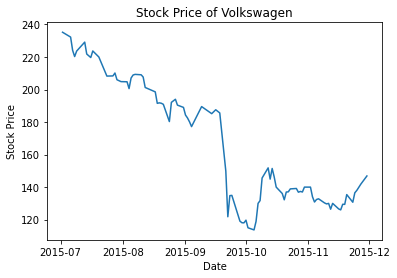

In [6]:
df_plot = df_stock[(df_stock['Date']>pd.to_datetime('07/01/2015')) & (df_stock['Date']<pd.to_datetime('12/01/2015'))]
plt.figure()
plt.plot(df_plot['Date'], df_plot[' Open'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price of Volkswagen')
plt.show()

In [7]:
# Merge two dataframes
df = pd.merge(df_text, df_stock, how='inner', on='Date')
df = df.sort_values('Date')

In [8]:
# show % change in stock price after news article publish
pct_stock = df[' Open'].pct_change()*100
df['% Change in Stock Price'] = pct_stock
pct_volume = df[' Volume'].pct_change()*100
df['% Change in Volume'] = pct_volume
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000


# Processing the text


## import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [9]:
# import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [10]:

text_nlp = nlp(df['Text'][1]) 
# Remove stop words
text_nlp_clean = [word for word in text_nlp if word.is_stop == False]
# Lemmatize words
text_nlp_clean = [word.lemma_ for word in text_nlp_clean]

In [11]:
text_clean = []
for ind, row in df.iterrows():
    
    # lower casing
    text_lower = row['Text'].lower()
    
    # tokenization
    text_nlp = nlp(row['Text']) 
    
    # remove punctuation and empty space
    text_nlp_clean = [word for word in text_nlp if not word.is_punct | word.is_space]
    
    # Remove stop words
    text_nlp_clean = [word for word in text_nlp_clean if word.is_stop == False]
    
    # Lemmatize tokens
    text_nlp_clean = [word.lemma_ for word in text_nlp_clean]
    
    # add preprocessed text to list
    text_clean.append(text_nlp_clean)

# turn list of strings to string
to_string = []
for text in text_clean:
    to_string.append(' '.join(text))


df['Text (clean)'] = to_string
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume,Text (clean)
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN,Toyota Motor Corp 7203.T rival global automake...
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416,Volkswagen VOWG_p de finance chief Hans Dieter...
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864,Toyota Motor Corp collaborate U.S. university ...
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922,Volkswagen AG VOWG_p DE face penalty $ 18 bill...
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000,International Council Clean Transportation ICC...



# Using a Pretrained Model 

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [13]:
# a function to return sentiment score
def polarity_score(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

vader_score = []
for text in df['Text (clean)']:
    score = polarity_score(text)
    vader_score.append(score)

df['Vader Sentiment Score'] = vader_score

In [14]:
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume,Text (clean),Vader Sentiment Score
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN,Toyota Motor Corp 7203.T rival global automake...,-0.9571
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416,Volkswagen VOWG_p de finance chief Hans Dieter...,0.9864
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864,Toyota Motor Corp collaborate U.S. university ...,0.9917
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922,Volkswagen AG VOWG_p DE face penalty $ 18 bill...,0.8720
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000,International Council Clean Transportation ICC...,0.8024


## Sentiment Analysis

In [15]:
# run this cell to import nltk
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs

In [16]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [18]:
# split the data into two pieces (80-20), one for training and one for testing (validation set)  
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [19]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [20]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [21]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11340


In [22]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        
        x[0,1] += freqs.get((word,1),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [23]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

In [24]:
Y.shape

(8000, 1)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline

### SVM Parameters

In [26]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}  

In [27]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [28]:

# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [29]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet_prob(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict_proba(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [30]:

my_tweet = 'The plot was terrible and I was sad until the ending!'
predict_tweet(my_tweet, freqs)

array([0.])

In [31]:
pip install torch

#START OF DEEP LEARNING

In [32]:
import sklearn
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import sklearn
import sklearn.ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics
import tensorflow as tf
from scipy.special import softmax
import os
import numpy as np
import pandas as pd
import json
import torch
import torch.nn as nn
import nltk
from tqdm import tqdm
import spacy
import torch
import torchtext
import torchtext.data
import torch.nn as nn
import torch.nn.functional as F
from scipy.special import softmax
from torchtext.vocab import Vocab
from nltk.corpus import twitter_samples 

nlp = spacy.load('en')


C:\Users\aashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.
C:\Users\aashi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aashi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aashi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as

OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\aashi\Anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# %% ----------------------------------- Hyper Parameters --------------------------------------------------------------
class Args:
    def __init__(self):
        self.seq_len = "get_max_from_data"
        self.embedding_dim = 50
        self.n_epochs = 10
        self.lr = 1e-2
        self.batch_size = 512
        self.train = True
        self.save_model = True


args = Args()

In [ ]:
# %% ----------------------------------- Helper Functions --------------------------------------------------------------
def acc(x, y, return_labels=False):
    with torch.no_grad():
        logits = torch.empty(len(x), 2)
        for batch in range(len(x) // args.batch_size + 1):
            inds = slice(batch * args.batch_size, (batch + 1) * args.batch_size)
            logits[inds] = model(x[inds])
        pred_labels = np.argmax(logits.cpu().numpy(), axis=1)
    if return_labels:
        return pred_labels
    else:
        return 100*accuracy_score(y.cpu().numpy(), pred_labels)


def extract_vocab_dict_and_msl(sentences_train, sentences_dev):
    """ Tokenizes all the sentences and gets a dictionary of unique tokens and also the maximum sequence length """
    tokens, ms_len = [], 0
    for sentence in list(sentences_train) + list(sentences_dev):
        tokens_in_sentence = nltk.word_tokenize(sentence)
        if ms_len < len(tokens_in_sentence):
            ms_len = len(tokens_in_sentence)
        tokens += tokens_in_sentence
    token_vocab = {key: i for key, i in zip(set(tokens), range(1, len(set(tokens))+1))}
    if len(np.unique(list(token_vocab.values()))) != len(token_vocab):
        "There are some rep words..."
    return token_vocab, ms_len


def convert_to_ids(raw_sentences, vocab_dict, pad_to):
    """ Takes an NumPy array of raw text sentences and converts to a sequence of token ids """
    x = np.empty((len(raw_sentences), pad_to))
    for idx, sentence in enumerate(raw_sentences):
        word_ids = []
        for token in nltk.word_tokenize(sentence):
            try:
                word_ids.append(vocab_dict[token])
            except:
                word_ids.append(vocab_dict[token])
        if pad_to < len(word_ids):
            x[idx] = word_ids[:pad_to]
        else:
            x[idx] = word_ids + [0] * (pad_to - len(word_ids))
    return x


def get_glove_embeddings(vocab_dict):
    with open("glove.6B.50d.txt", "r") as s:
        glove = s.read()
    embeddings_dict = {}
    for line in glove.split("\n")[:-1]:
        text = line.split()
        if text[0] in vocab_dict:
            embeddings_dict[vocab_dict[text[0]]] = torch.from_numpy(np.array(text[1:], dtype="float32"))
    return embeddings_dict


def get_glove_table(vocab_dict, glove_dict):
    lookup_table = torch.empty((len(vocab_dict)+2, 50))
    for token_id in sorted(vocab_dict.values()):
        if token_id in glove_dict:
            lookup_table[token_id] = glove_dict[token_id]
        else:
            lookup_table[token_id] = torch.zeros((1, 50))  # For unknown tokens
    lookup_table[0] = torch.zeros((1, 50))
    return lookup_table



In [ ]:
data_train = pd.read_csv("original_data/train.tsv", sep="\t")
x_train_raw, y_train = data_train["sentence"].values, torch.LongTensor(data_train["label"].values).to(device)
data_dev = pd.read_csv("original_data/dev.tsv", sep="\t")
x_dev_raw, y_dev = data_dev["sentence"].values, torch.LongTensor(data_dev["label"].values).to(device)


In [ ]:
# %% -------------------------------------- Data Prep ------------------------------------------------------------------
try:
    with open("example_prep_data/vocab_dict.json", "r") as s:
        token_ids = json.load(s)
    msl = np.load("example_prep_data/max_sequence_length.npy").item()
except:
    print("Tokenizing all the examples to get a vocab dict and the maximum sequence length...")
    token_ids, msl = extract_vocab_dict_and_msl(x_train_raw, x_dev_raw)
    os.mkdir("example_prep_data")
    with open("example_prep_data/vocab_dict.json", "w") as s:
        json.dump(token_ids, s)
    np.save("example_prep_data/max_sequence_length.npy", np.array([msl]))
if args.seq_len == "get_max_from_data":
    args.seq_len = msl

glove_embeddings = get_glove_embeddings(token_ids)

try:
    x_train = np.load("example_prep_data/prep_train_len{}.npy".format(args.seq_len))
    x_dev = np.load("example_prep_data/prep_dev_len{}.npy".format(args.seq_len))
except:
    print("Converting all the sentences to sequences of token ids...")
    x_train = convert_to_ids(x_train_raw, token_ids, args.seq_len)
    np.save("example_prep_data/prep_train_len{}.npy".format(args.seq_len), x_train)
    x_dev = convert_to_ids(x_dev_raw, token_ids, args.seq_len)
    np.save("example_prep_data/prep_dev_len{}.npy".format(args.seq_len), x_dev)




In [ ]:
x_train, x_dev = torch.LongTensor(x_train).to(device), torch.LongTensor(x_dev).to(device)

In [ ]:
# %% -------------------------------------- CNN Class ------------------------------------------------------------------
class CNN(nn.Module):
    def __init__(self, vocab_size):
        super(CNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size + 2, args.embedding_dim)

        self.conv1 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 9)
        self.convnorm1 = nn.BatchNorm1d(args.embedding_dim)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 9)
        self.convnorm2 = nn.BatchNorm1d(args.embedding_dim)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 7)
        self.linear = nn.Linear(args.embedding_dim, 2)
        self.act = torch.relu

    def forward(self, x):
        # nn.Conv1d operates on the columns, each embedding dimension is considered as one channel
        x = self.embedding(x).permute(0, 2, 1)
        x = self.pool1(self.convnorm1(self.act(self.conv1(x))))
        x = self.pool2(self.convnorm2(self.act(self.conv2(x))))
        return self.linear(self.act(self.conv3(x)).reshape(-1, args.embedding_dim))



In [ ]:
# %% -------------------------------------- Training Prep ----------------------------------------------------------
model = CNN(len(token_ids)).to(device)
look_up_table = get_glove_table(token_ids, glove_embeddings)
model.embedding.weight.data.copy_(look_up_table)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
# %% -------------------------------------- Training Loop ----------------------------------------------------------
labels_ditrib = torch.unique(y_dev, return_counts=True)
print("The no information rate is {:.2f}".format(100*labels_ditrib[1].max().item()/len(y_dev)))
if args.train:
    acc_dev_best = 0
    print("Starting training loop...")
    for epoch in range(args.n_epochs):

        loss_train, train_steps = 0, 0
        model.train()
        total = len(x_train) // args.batch_size + 1  # Initiates a progress bar that will be updated for each batch
        with tqdm(total=total, desc="Epoch {}".format(epoch)) as pbar:  # "Epoch" will be updated for each epoch
            for batch in range(len(x_train)//args.batch_size + 1):
                inds = slice(batch*args.batch_size, (batch+1)*args.batch_size)
                optimizer.zero_grad()
                logits = model(x_train[inds])
                loss = criterion(logits, y_train[inds])
                loss.backward()
                optimizer.step()
                loss_train += loss.item()
                train_steps += 1
                pbar.update(1)  # Updates the progress and the training loss
                pbar.set_postfix_str("Training Loss: {:.5f}".format(loss_train / train_steps))

        model.eval()
        with torch.no_grad():
            y_dev_pred = model(x_dev)
            loss = criterion(y_dev_pred, y_dev)
            loss_test = loss.item()

        acc_dev = acc(x_dev, y_dev)
        print("Epoch {} | Train Loss {:.5f}, Train Acc {:.2f} - Test Loss {:.5f}, Test Acc {:.2f}".format(
            epoch, loss_train/train_steps, acc(x_train, y_train), loss_test, acc_dev))

        if acc_dev > acc_dev_best and args.save_model:
            torch.save(model.state_dict(), "cnn_sentiment.pt")
            print("The model has been saved!")
            acc_dev_best = acc_dev

# Test of Deep Learning

In [35]:
x = None
for i in range(10):
    test = convert_to_ids([x_train_raw[i]], token_ids, args.seq_len)
    test = torch.LongTensor(test).to(device)
    pred = model(test).cpu().detach().numpy()[0]
    x = softmax(pred)
    print(softmax(pred),y_train[i])

[0.5801302 0.4198698] tensor(0)
[0.6566592 0.3433408] tensor(0)
[0.6610051  0.33899492] tensor(1)
[0.67801875 0.32198125] tensor(0)
[0.64640886 0.3535912 ] tensor(0)
[0.49857607 0.5014239 ] tensor(0)
[0.60241646 0.3975836 ] tensor(1)
[0.57649475 0.42350525] tensor(1)
[0.53299826 0.4670017 ] tensor(0)
[0.729913   0.27008694] tensor(1)


In [36]:

x = None
deep_learning_sentiment_prob = []

for i in df.iloc[:,2]:
    test = convert_to_ids([i], token_ids, args.seq_len)
    test = torch.LongTensor(test).to(device)
    pred = model(test).cpu().detach().numpy()[0]
    x = softmax(pred)
    sentiment_prob.append(x[1])

KeyError: 'Toyota'

In [37]:
df['deep_learning_sentiment_prob'] = sentiment_prob

NameError: name 'sentiment_prob' is not defined

#END OF DEEP LEARNING

# Testing the Model 

In [ ]:
sentiment = []
sentiment_prob = []
for i in df.iloc[:,2]:
    sentiment.append(predict_tweet(i, freqs)[0])
    sentiment_prob.append(predict_tweet_prob(i, freqs)[0][1])

In [ ]:
sentiment


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
sentiment_prob

[0.11011737395528699,
 0.32362056802365324,
 0.17058625468535882,
 0.011389621884586525,
 2.0200050075790174e-05,
 5.936869659795721e-10,
 0.0008369896929365236,
 2.1012563156613959e-07,
 8.371320562209231e-05,
 0.10619206900869374,
 0.3691674765745842,
 0.001845132376430351,
 3.1217756180908695e-06]

In [ ]:
df.head()

,Date,Header,Text,Volume,Open,% Change in Stock Price,% Change in Volume,Text (clean),Vader Sentiment Score,Linear Regression Sentiment,sentiment_prob
0,2015-08-18,Global automakers divert shipments from China'...,- Toyota Motor Corp 7203.T and rival global a...,351.0,191.50,NaN,NaN,Toyota Motor Corp 7203.T rival global automake...,-0.9571,0.0,0.110117
1,2015-09-03,VW's finance chief set to become new chairman,- Volkswagen's VOWG_p.DE finance chief Hans D...,295.0,180.10,-5.953003,-15.954416,Volkswagen VOWG_p de finance chief Hans Dieter...,0.9864,0.0,0.323621
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",- Toyota Motor Corp is collaborating with two...,51.0,177.20,-1.610217,-82.711864,Toyota Motor Corp collaborate U.S. university ...,0.9917,0.0,0.170586
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,- Volkswagen AG VOWG_p.DE faces penalties up ...,209.0,185.60,4.740406,309.803922,Volkswagen AG VOWG_p DE face penalty $ 18 bill...,0.8720,0.0,0.011390
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,- When the International Council for Clean Tr...,20900.0,149.88,-19.245690,9900.000000,International Council Clean Transportation ICC...,0.8024,0.0,0.000020


In [ ]:

df['Logistic Regression Sentiment'] = sentiment
df['sentiment_prob'] = sentiment_prob
columns = ['Date', 'Header', 'Text (clean)', '% Change in Stock Price', 'Vader Sentiment Score', 'Logistic Regression Sentiment']
df[columns].head()

,Date,Header,Text (clean),% Change in Stock Price,Vader Sentiment Score,Logistic Regression Sentiment
0,2015-08-18,Global automakers divert shipments from China'...,Toyota Motor Corp 7203.T rival global automake...,NaN,-0.9571,0.0
1,2015-09-03,VW's finance chief set to become new chairman,Volkswagen VOWG_p de finance chief Hans Dieter...,-5.953003,0.9864,0.0
2,2015-09-04,"Toyota partners with Stanford, MIT on self-dri...",Toyota Motor Corp collaborate U.S. university ...,-1.610217,0.9917,0.0
3,2015-09-18,Volkswagen could face $18 billion penalties fr...,Volkswagen AG VOWG_p DE face penalty $ 18 bill...,4.740406,0.8720,0.0
4,2015-09-21,Volkswagen's 'clean diesel' strategy unraveled...,International Council Clean Transportation ICC...,-19.245690,0.8024,0.0
